# Wheat varieties prediction using ANN
## Objective: To implement artificial neural network from scratch



## Artificial neural network

Artificial neural networks are relatively crude electronic networks of neurons based on the neural structure of the brain. They process records one at a time, and learn by comparing their classification of the record (i.e., largely arbitrary) with the known actual classification of the record. The errors from the initial classification of the first record is fed back into the network, and used to modify the networks algorithm for further iterations.

A neuron in an artificial neural network is

1. A set of input values (xi) and associated weights (wi).

2. A function (g) that sums the weights and maps the results to an output (y).

### Parameters
We can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.
How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.








###Activation function
We also need to pick an *activation function* for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are [tanh](https://reference.wolfram.com/language/ref/Tanh.html), the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), or [ReLUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). 


Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the *loss function*. A common choice with the softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

Remember that our goal is to find the parameters that minimize our loss function. We can use [gradient descent](http://cs231n.github.io/optimization-1/) to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also [decay the learning rate over time](http://cs231n.github.io/neural-networks-3/#anneal).

### Gradient descent
As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous *backpropagation algorithm*, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations ([here](http://colah.github.io/posts/2015-08-Backprop/) or [here](http://cs231n.github.io/optimization-2/)) floating around the web.

### Backpropagation formula
Applying the backpropagation formula we find the following:

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

## Dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## Attributes
1.	area A,
2.	perimeter P,
3.	compactness C = 4*pi*A/P^2,
4.	length of kernel,
5.	width of kernel,
6.	asymmetry coefficient
7.	length of kernel groove.

## Target Class
Varieties of wheat: Kama, Rosa and Canadian.

## Source: https://www.kaggle.com/rwzhang/seeds-dataset



## Task 1: Implement Artificial Neural Networks from Scratch
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks from Scratch
5.	Train your neural model from scratch
6.	Evaluate the training and testing accuracy of your own model

## Task 2: Implement SKLEARN’s Artificial Neural Networks
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks using SKLEARN’s library
5.	Train SKLEARN’s neural model 
6.	Evaluate the training and testing accuracy of SKLEARN’s model

# Task 3: Play with hyper-parameters
1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network

###Helpful links: 
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

# Additonal work (not considered in evaluation)
Instead of batch gradient descent, use minibatch gradient descent ([more info](http://cs231n.github.io/optimization-1/#gd))

Use various activation functions

##Task 1: Implement Artificial Neural Networks from Scratch


In [1]:
# Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import random
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
cols="""
1.	area A,
2.	perimeter P,
3.	compactness C = 4*pi*A/P^2,
4.	length of kernel,
5.	width of kernel,
6.	asymmetry coefficient
7.	length of kernel groove.
"""
cols=cols.split('\n')
for i in range(len(cols)):
    cols[i]=cols[i][3:-1]
cols=cols[1:-1]
cols.append('varieties of wheat')
cols

['area A',
 'perimeter P',
 'compactness C = 4*pi*A/P^2',
 'length of kernel',
 'width of kernel',
 'asymmetry coefficien',
 'length of kernel groove',
 'varieties of wheat']

In [3]:
# Load the dataset 
df=pd.read_table("seeds_dataset.txt")
#df.columns=cols
df.columns=cols
df

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficien,length of kernel groove,varieties of wheat
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
...,...,...,...,...,...,...,...,...
204,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
205,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
206,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
207,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)
scaler=MinMaxScaler()
df.iloc[:,0:7]=scaler.fit_transform(df.iloc[:,0:7])
df

,area A,perimeter P,compactness C = 4*pi*A/P^2,length of kernel,width of kernel,asymmetry coefficien,length of kernel groove,varieties of wheat
0,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,1
1,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,1
2,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,1
3,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,1
4,0.357885,0.371901,0.789474,0.274212,0.486101,0.220637,0.215165,1
...,...,...,...,...,...,...,...,...
204,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,3
205,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,3
206,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,3
207,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,3


In [5]:
X=np.array(df.drop('varieties of wheat',axis=1))
y=np.array(df['varieties of wheat'])-1

In [6]:
# Divide the dataset to training (70 %) and testing set (30 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Define initial parameters of ANN and gradient descent:
# input layer dimensionality, output layer dimensionality, learning rate (epsilon) for gradient descent and regularization strength (lambda)
inpdim=X.shape[1]
outdim=len(pd.Series(y).unique())
hiddendim=7
lr=0.01
lambd=0.01

In [158]:
# Define total loss function
W1 = np.random.randn(inpdim, hiddendim) / np.sqrt(inpdim)
b1 = np.zeros((1, hiddendim))
W2 = np.random.randn(hiddendim, outdim) / np.sqrt(hiddendim)
b2 = np.zeros((1, outdim))
params={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
def relu(x):
    return x * (x > 0)
def loss(X,y,params):
    num_examples=len(X)
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    data_loss += lambd / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / num_examples * data_loss
    

In [159]:
# Prediction function using activation function
def predict(params, x):
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [163]:
# Write downn ANN code from scratch
def build_model(X, y, hiddendim, epochs=2500, print_loss=False):
    num_examples = len(X)
    np.random.seed(0)
    W1 = np.random.randn(inpdim, hiddendim) / np.sqrt(inpdim)
    b1 = np.zeros((1, hiddendim))
    W2 = np.random.randn(hiddendim, outdim) / np.sqrt(hiddendim)
    b2 = np.zeros((1, outdim))
    params = {}
    for i in range(0, epochs):
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        dW2 += lambd * W2
        dW1 += lambd * W1

        W1 += -lr * dW1
        b1 += -lr * db1
        W2 += -lr * dW2
        b2 += -lr * db2

        params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        if print_loss and i % 100 == 0:
            print("Loss after iteration %i: %f" % (i, loss(X,y,params)))

    return params

In [164]:
# Train your own ANN model
model = build_model(X_train, y_train, hiddendim, print_loss=True)

Loss after iteration 0: 1.075582
Loss after iteration 100: 0.571105
Loss after iteration 200: 0.697206
Loss after iteration 300: 0.749958
Loss after iteration 400: 0.722820
Loss after iteration 500: 0.774668
Loss after iteration 600: 0.761661
Loss after iteration 700: 0.782538
Loss after iteration 800: 0.806012
Loss after iteration 900: 0.858584
Loss after iteration 1000: 0.661800
Loss after iteration 1100: 0.688316
Loss after iteration 1200: 0.664779
Loss after iteration 1300: 0.677732
Loss after iteration 1400: 0.697715
Loss after iteration 1500: 0.728125
Loss after iteration 1600: 0.767805
Loss after iteration 1700: 0.803690
Loss after iteration 1800: 0.841007
Loss after iteration 1900: 0.875711
Loss after iteration 2000: 0.906670
Loss after iteration 2100: 0.934328
Loss after iteration 2200: 0.959254
Loss after iteration 2300: 0.981750
Loss after iteration 2400: 1.001676


In [165]:
# Test your own ANN model and evaluate performance in terms of accuracy
print(accuracy_score(y_train,predict(model,X_train)))
print(accuracy_score(y_test,predict(model,X_test)))

1.0
0.9365079365079365


##Task 2: Implement SKLEARN’s Artificial Neural Networks

In [166]:
#Obtain the training and testing set

In [171]:
# Build SKLEARN's ANN model
model=MLPClassifier(learning_rate_init=0.01,alpha=0.01)
model.fit(X_train,y_train)
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_test,model.predict(X_test)))

1.0
0.9365079365079365


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Test your own ANN model and evaluate performance in terms of accuracy

# Task 3: Play with hyper-parameters


1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network

In [28]:
learning_rates=np.arange(0.001,0.02,0.001)
reg=np.arange(0.001,0.02,0.001)
neurons=np.arange(1,300,1)
layers=[]

In [29]:
a=[]
for i in range(1,20):
    a.append(100)
    layers.append(tuple(a))

In [21]:
lraccuracies=[]
regaccuracies=[]
for i in range(len(learning_rates)):
    model=MLPClassifier(learning_rate_init=learning_rates[i])
    model.fit(X_train,y_train)
    lraccuracies.append({'train':accuracy_score(y_train,model.predict(X_train))
                        ,'test':accuracy_score(y_test,model.predict(X_test))})
    if(i%2==0):
        print(str(i)+" Models done")
print()
print("Reg models are going to execute now")
for i in range(len(reg)):
    model=MLPClassifier(alpha=reg[i])
    model.fit(X_train,y_train)
    regaccuracies.append({'train':accuracy_score(y_train,model.predict(X_train))
                         ,'test':accuracy_score(y_test,model.predict(X_test))})
    if(i%2==0):
        print(str(i)+" Models done")

0 Models done
2 Models done
4 Models done
6 Models done
8 Models done
10 Models done
12 Models done
14 Models done
16 Models done
18 Models done

Reg models are going to execute now
0 Models done
2 Models done
4 Models done
6 Models done
8 Models done
10 Models done
12 Models done
14 Models done
16 Models done
18 Models done


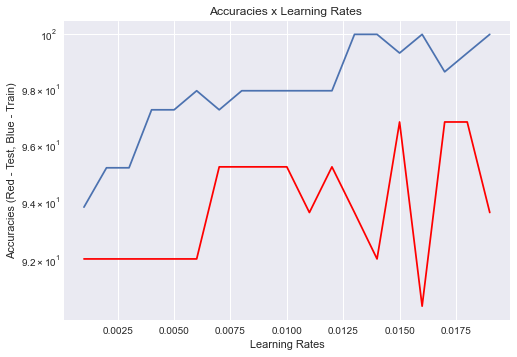

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.yscale('log')
plt.ylabel('Accuracies (Red - Test, Blue - Train)')
plt.xlabel('Learning Rates')
plt.title('Accuracies x Learning Rates ')
plt.plot(learning_rates,[lraccuracies[i]['train']*100 for i in range(len(learning_rates))])
plt.plot(learning_rates,[lraccuracies[i]['test']*100 for i in range(len(learning_rates))],color='red')


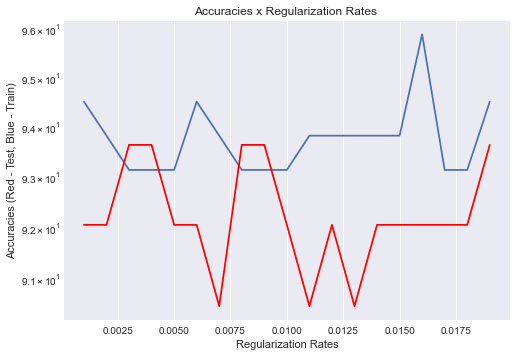

In [23]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.yscale('log')
plt.ylabel('Accuracies (Red - Test, Blue - Train)')
plt.xlabel('Regularization Rates')
plt.title('Accuracies x Regularization Rates ')
plt.plot(reg,[regaccuracies[i]['train']*100 for i in range(len(reg))])
plt.plot(reg,[regaccuracies[i]['test']*100 for i in range(len(reg))],color='red')


In [32]:
naccuracies=[]
for i in neurons:
    model=MLPClassifier(hidden_layer_sizes=(i,))
    model.fit(X_train,y_train)
    naccuracies.append({'train':accuracy_score(y_train,model.predict(X_train))
                        ,'test':accuracy_score(y_test,model.predict(X_test))})
    if(i%10==0):
        print(str(i)+" Models done")

10 Models done
20 Models done
30 Models done
40 Models done
50 Models done
60 Models done
70 Models done
80 Models done
90 Models done
100 Models done
110 Models done
120 Models done
130 Models done
140 Models done
150 Models done
160 Models done
170 Models done
180 Models done
190 Models done
200 Models done
210 Models done
220 Models done
230 Models done
240 Models done
250 Models done
260 Models done
270 Models done
280 Models done
290 Models done


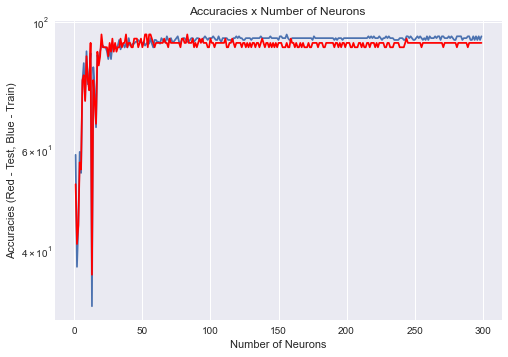

In [36]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.yscale('log')
plt.ylabel('Accuracies (Red - Test, Blue - Train)')
plt.xlabel('Number of Neurons')
plt.title('Accuracies x Number of Neurons ')
plt.plot(neurons,[naccuracies[i]['train']*100 for i in range(len(neurons))])
plt.plot(neurons,[naccuracies[i]['test']*100 for i in range(len(neurons))],color='red')


In [40]:
laccuracies=[]
c=0
for i in layers:
    model=MLPClassifier(hidden_layer_sizes=i)
    model.fit(X_train,y_train)
    laccuracies.append({'train':accuracy_score(y_train,model.predict(X_train))
                        ,'test':accuracy_score(y_test,model.predict(X_test))})
    c+=1
    if(c%2==0):
        print(str(c)+" Models done")
    

2 Models done
4 Models done
6 Models done
8 Models done
10 Models done
12 Models done
14 Models done
16 Models done
18 Models done


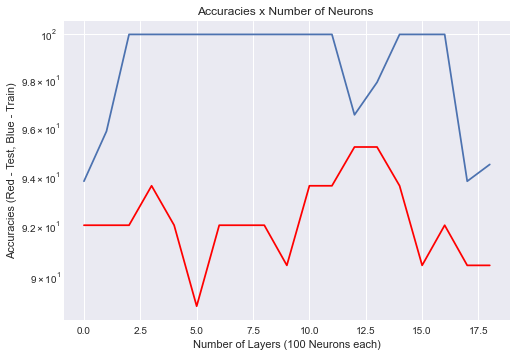

In [46]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.yscale('log')
plt.ylabel('Accuracies (Red - Test, Blue - Train)')
plt.xlabel('Number of Layers (100 Neurons each)')
plt.title('Accuracies x Number of Neurons ')
plt.plot([i for i in range(19)],[laccuracies[i]['train']*100 for i in range(19)])
plt.plot([i for i in range(19)],[laccuracies[i]['test']*100 for i in range(19)],color='red')
